<a href="https://colab.research.google.com/github/AycaCicek/DogrusalOlmayanRegresyonModelleri/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/content/Hitters.csv")
data.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [4]:
data=data.dropna()
data_encoding=pd.get_dummies(data[["League","Division","NewLeague"]])
data_encoding.head(3)

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1


In [5]:
y=data["Salary"]
X_=data.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,data_encoding[["League_N","Division_W","NewLeague_N"]]],axis=1).astype("float64")
X.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1.0,1.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1.0,0.0,1.0


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

MODEL VE TAHMİN

In [7]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [8]:
rf_model.get_params()
#min_samples_leaf:
#n_estimators:kullanılacak ağaç sayısı

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [9]:
y_pred=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

MODEL TUNING

In [10]:
rf_params={"max_depth": [5,8,10],
           "max_features": [2,5,10],
           "n_estimators": [200,500,1000,2000],
            "min_samples_split": [2,10,80,100]}

In [13]:
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=10,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators

In [15]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [19]:
rf_tuned_model=RandomForestRegressor(random_state=42,max_depth=8,max_features=2,n_estimators=200,min_samples_split=2)
rf_tuned=rf_tuned_model.fit(X_train,y_train)

In [20]:
y_pred=rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

DEĞİŞKEN ÖNEM DÜZEYİ

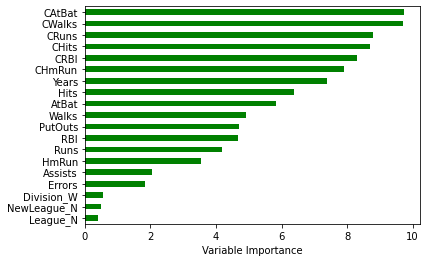

In [24]:
Importance=pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},index=X_train.columns)
Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="green",)
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

**Değişken fazla olduğu zaman